# Spam Classification using ML

In [1]:
# Naive Bayes
# toss: once:
# head = 1/2 = 0.5
# p(tail) = 0.5

In [ ]:
# Naive Bayes: this ml model just assume that there is no correlation
# b/w give X features
# corr b/w x and y
# if we are getting corr b/w x feature 1 with feature or with feature 3 or so on
# this becomes problem for ML
# Multicollinearity : we need to eliminate or remove this features
# but we know tnat in actual situation: naive: behaves like let just pre-assume
# that there is no such corr b/w features

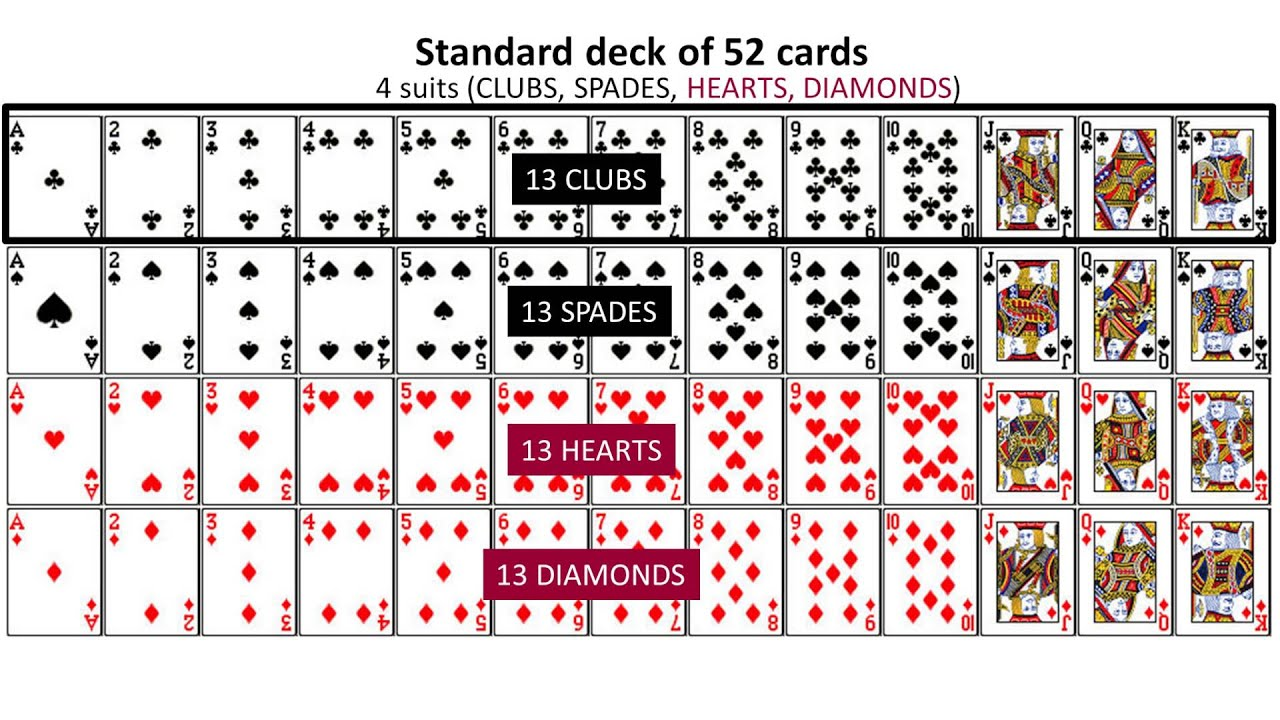

In [2]:
# face cards: 12
# king : 4  cards
# total cards: 52

# p(king)  = 4/52
# 4/52 : 1/13

0.07692307692307693

In [3]:
# Probability of getting Ace of black colors
# 2/52 = 1/26

In [4]:
# probability of getting a face card
# face cards = 12
# total cards = 52
# p(face_card) = 12/52  =
# 3/12

In [5]:
# Probability of getting Ace of any colors
# ace = 4
# total_cards = 52

# p(ace) = 4/52
# 1/13

In [6]:
# Bayes : conditional probability
# One event already occurred and
# to check probability of another event that based on the first one

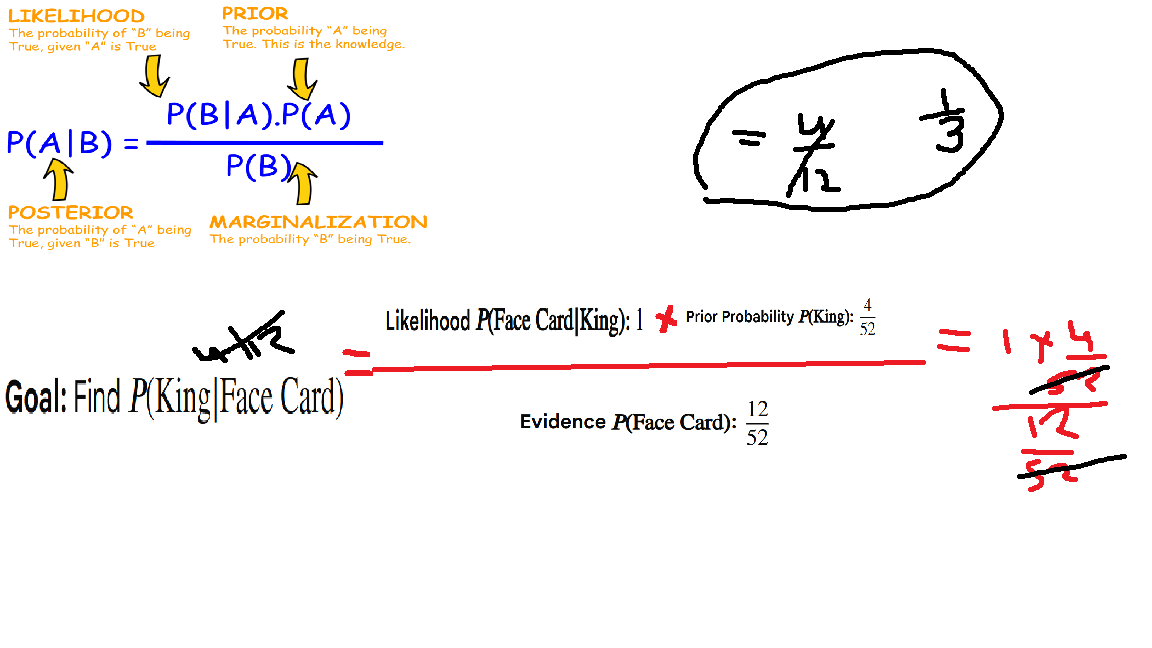

In [7]:
# Naive Bayes: we mostly use this in text kind of work
# sentiment analysis
# SPAM classification
# Positive or negative reviews analysis
# Fake news or vs actual news


# SPAM classification

In [8]:
# Step 1 load important modules

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings('ignore')
print('All Modules Loaded Successfully!!')

All Modules Loaded Successfully!!


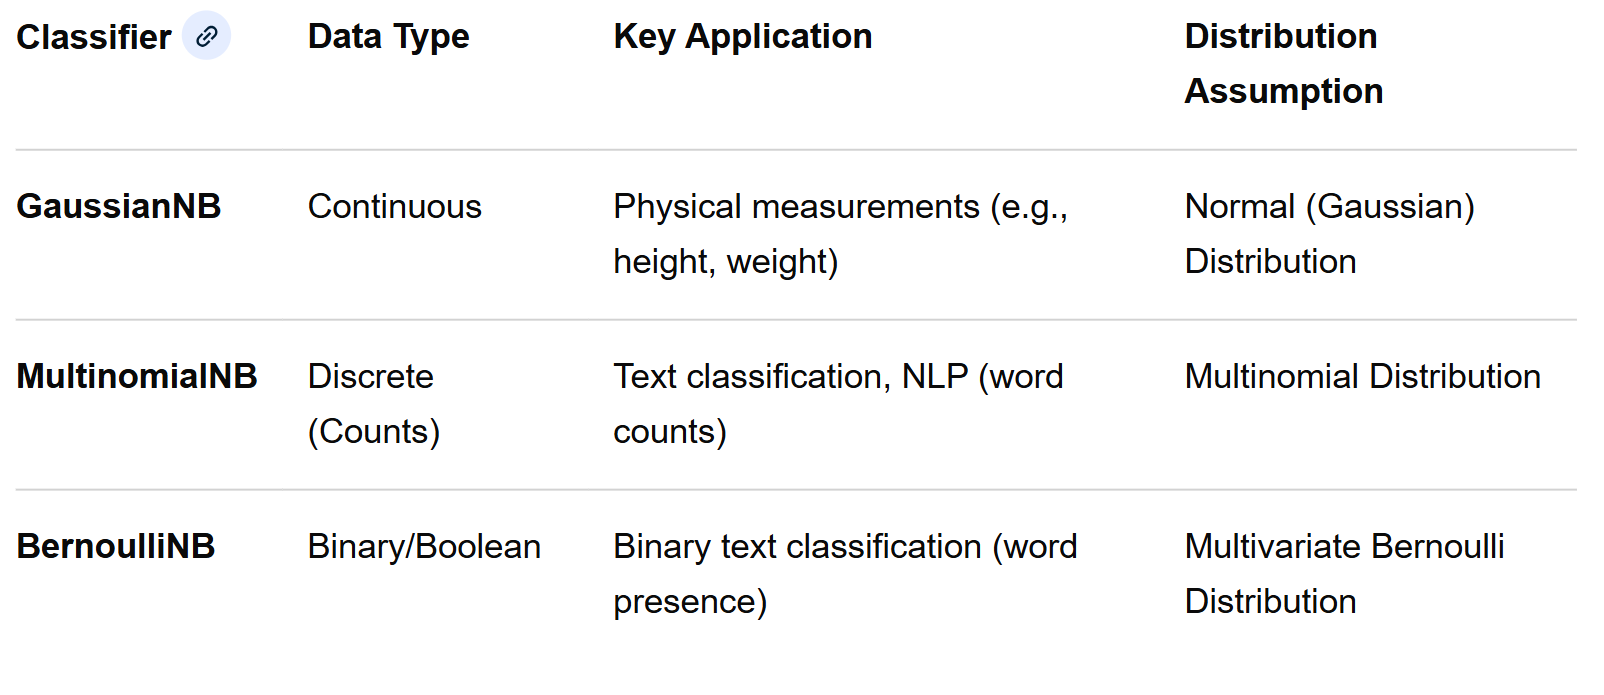

In [12]:
# Step 2: Load dataset

In [16]:
url = 'https://github.com/axisgras-hash/ML-Z-Skill/blob/main/spam.csv?raw=true'

df = pd.read_csv(url)
df.sample()

,Category,Message
4922,ham,Its so common hearin How r u? Wat r u doing? H...


In [17]:
# ML only works with numerical data


In [18]:
df.shape

(5572, 2)

In [23]:
df.sample(5)

,Category,Message
2274,ham,Cold. Dont be sad dear
1728,ham,I went to project centre
2410,ham,Aww that's the first time u said u missed me w...
2354,spam,Please CALL 08712402902 immediately as there i...
5236,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...


In [31]:
df['Message'].sample().values[0]

"No shit, but I wasn't that surprised, so I went and spent the evening with that french guy I met in town here and we fooled around a bit but I didn't let him fuck me"

In [32]:
# since all email messages are textual in nature we have to convert this to numerical one
# countvectorizer

In [38]:
dummy = 'I liked Dhoom 3 very much Border 2 was very awesome movie Acting was very bad in 3 idiots'.lower()
vocab = list(set(dummy.split(' ')))
print(vocab)

['3', 'i', 'border', 'awesome', 'very', 'liked', 'movie', 'dhoom', '2', 'in', 'much', 'acting', 'idiots', 'bad', 'was']


In [43]:
# Feature Engineering or feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['Message']).toarray()

In [44]:
X.shape

(5572, 8709)

In [45]:
# 8709: are unique vocab words

In [48]:
y = df['Category'].map({"spam":1, 'ham':0})

In [49]:
X.shape

(5572, 8709)

In [50]:
y.shape

(5572,)

In [51]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [53]:
y.values

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [55]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [56]:
# train score
model.score(X_train, y_train)

0.9939421135292797

In [57]:
# test score
model.score(X_test,y_test)

0.9856502242152466

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
y_pred = model.predict(X_test)

In [60]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[957,   9],
       [  7, 142]])

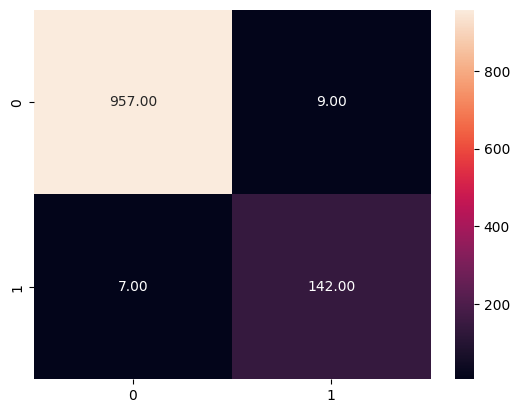

In [65]:
sns.heatmap(cm, annot = True, fmt='.2f')
plt.show()

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.94      0.95      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [67]:
dummy_mail = '''Congratulations! You've won a $1000 gift card! Click here to claim: http://spam-link.com'''

dummy_data = cv.transform([dummy_mail]).toarray()
ans = model.predict(dummy_data)[0]
if ans == 1:
  print('Spam Mail')
else:
  print('Ham Mail')

Spam Mail


In [68]:
mail = '''Hi John, just wanted to confirm our meeting for tomorrow at 10 AM. Let me know if that works for you. Cheers, Sarah'''

In [69]:
dummy_data = cv.transform([mail]).toarray()
ans = model.predict(dummy_data)[0]
if ans == 1:
  print('Spam Mail')
else:
  print('Ham Mail')

Ham Mail
